In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Define paths with raw strings
train_dir = r"C:\Users\adarsh\Downloads\CNN\ODIA NUMBER CLASSIFICATION SYSTEM\DATASET\TRAINING"
val_dir = r"C:\Users\adarsh\Downloads\CNN\ODIA NUMBER CLASSIFICATION SYSTEM\DATASET\VALIDATION"

# Load datasets with `format='tif'` to include TIFF files
raw_train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(200, 200),
    batch_size=50,
)
raw_val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(200, 200),
    batch_size=50,
)

Found 600 files belonging to 10 classes.
Found 600 files belonging to 10 classes.


In [2]:
class_names = raw_train_dataset.class_names
print("Class names:", class_names)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [5]:
# Define preprocessing function
def preprocess_image(image, label):
    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Preprocess and optimize pipeline
train_dataset = raw_train_dataset.map(preprocess_image).shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = raw_val_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

In [7]:
# Define CNN model
model = models.Sequential([
    layers.Input(shape=(200, 200, 3)),  # Explicit input layer
    layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='valid', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=len(class_names), activation='softmax')
])

In [8]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,206,730 (19.86 MB)

 Trainable params: 5,206,730 (19.86 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 605ms/step - accuracy: 0.1227 - loss: 2.5600 - val_accuracy: 0.2383 - val_loss: 2.2983
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 535ms/step - accuracy: 0.1426 - loss: 2.2928 - val_accuracy: 0.3100 - val_loss: 2.2313
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 551ms/step - accuracy: 0.3187 - loss: 2.1657 - val_accuracy: 0.6183 - val_loss: 1.6225
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 587ms/step - accuracy: 0.5348 - loss: 1.5331 - val_accuracy: 0.8667 - val_loss: 0.5931
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 580ms/step - accuracy: 0.7409 - loss: 0.7909 - val_accuracy: 0.9250 - val_loss: 0.2453
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 602ms/step - accuracy: 0.8600 - loss: 0.4092 - val_accuracy: 0.9550 - val_loss: 0.1176
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 596ms/step - accuracy: 0.8940 - loss: 0.2678 - val_accuracy: 0.9817 - val_loss: 0.0670
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.9553 - loss: 0.1650 - val_accura

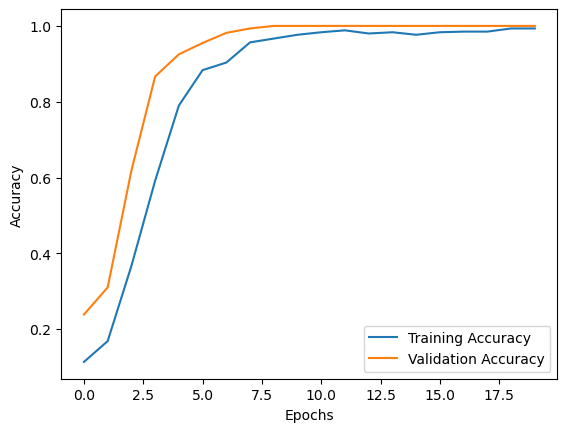

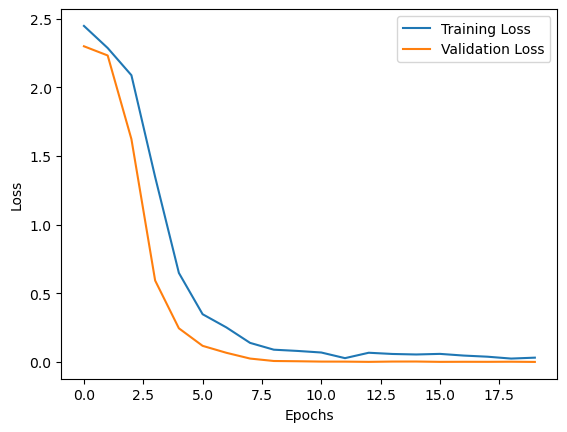

In [9]:
# Print model summary
print(model.summary())

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Found 600 files belonging to 10 classes.
Test Loss: 0.3884
Test Accuracy: 95.3333%


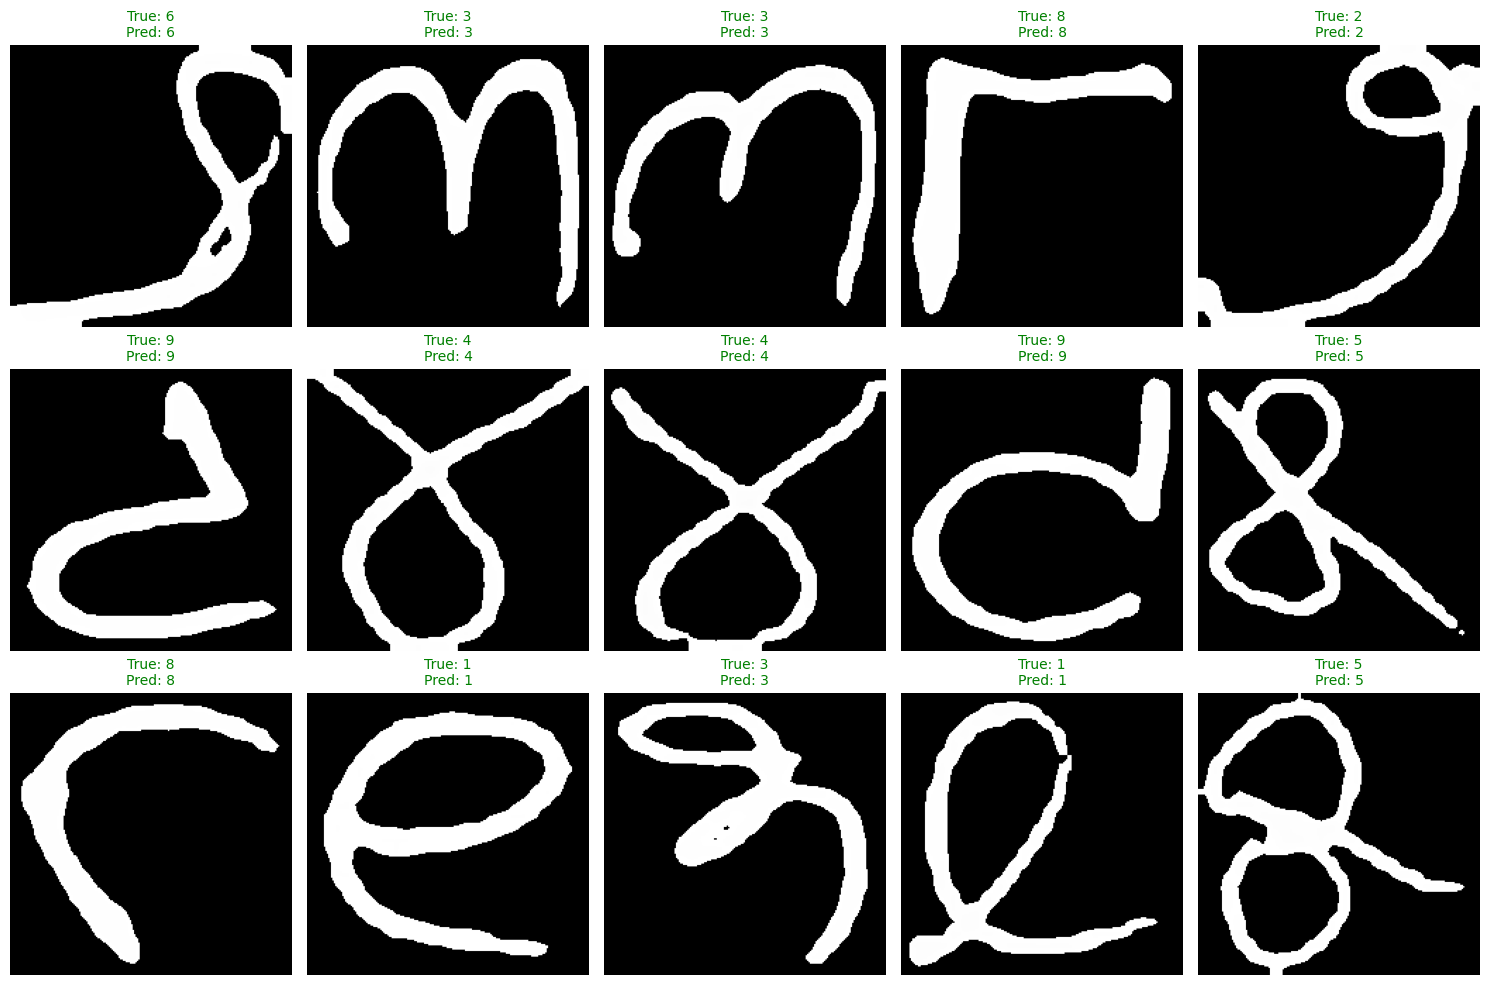

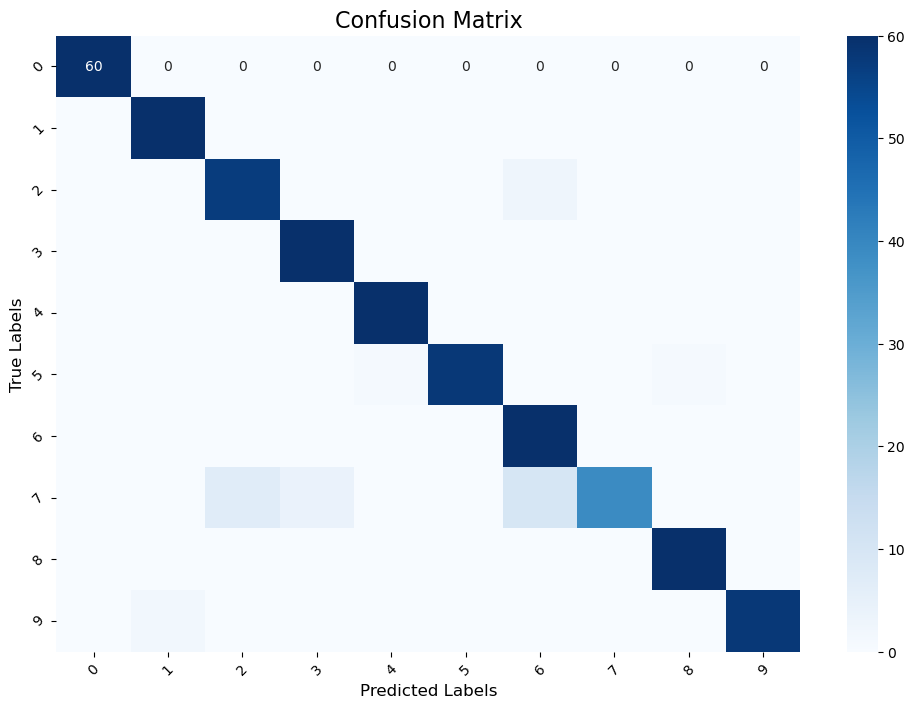

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.97      1.00      0.98        60
           2       0.89      0.95      0.92        60
           3       0.94      1.00      0.97        60
           4       0.98      1.00      0.99        60
           5       1.00      0.97      0.98        60
           6       0.82      1.00      0.90        60
           7       1.00      0.65      0.79        60
           8       0.98      1.00      0.99        60
           9       1.00      0.97      0.98        60

    accuracy                           0.95       600
   macro avg       0.96      0.95      0.95       600
weighted avg       0.96      0.95      0.95       600



In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Define the dataset directory
test_dir = r"C:\Users\adarsh\Downloads\CNN\ODIA NUMBER CLASSIFICATION SYSTEM\DATASET\TESTING"

# Load the dataset
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(200, 200),
    batch_size=50
)

# Save the class names before preprocessing
class_names = test_dataset.class_names

# Preprocess the dataset (if required)
def preprocess_image(image, label):
    image = tf.image.per_image_standardization(image)  # Standardize images
    return image, label

test_dataset = test_dataset.map(preprocess_image).prefetch(tf.data.AUTOTUNE)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4%}")

# Visualize predictions grid
num_images_to_display = 15  # Adjust the number of images to display
y_pred = []
y_true = []
images_list = []

# Collect predictions and images
for image_batch, label_batch in test_dataset:
    predictions = model.predict(image_batch, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(label_batch.numpy())
    images_list.extend(image_batch.numpy())

# Convert to NumPy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)
images_list = np.array(images_list)

# Randomly select indices for visualization
indices = np.random.choice(len(y_pred), size=num_images_to_display, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(indices):
    img = images_list[idx]
    true_label = class_names[y_true[idx]]
    predicted_label = class_names[y_pred[idx]]
    
    plt.subplot(3, 5, i + 1)  # Create a 3x5 grid for 15 images
    plt.imshow(img.astype("uint8"))
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontsize=10, color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))